In [40]:
!pip install opencv-python-headless numpy matplotlib scikit-image

Defaulting to user installation because normal site-packages is not writeable


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [42]:
image = cv2.imread('sample.jpg')

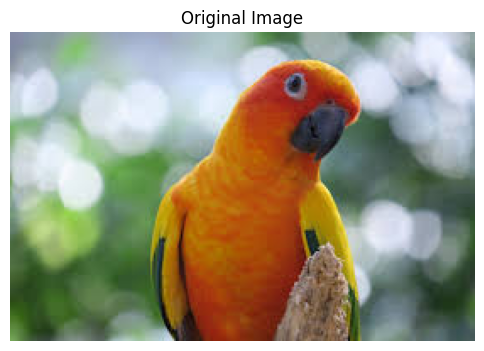

In [43]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display in Matplotlib

# Display Original Image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [44]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

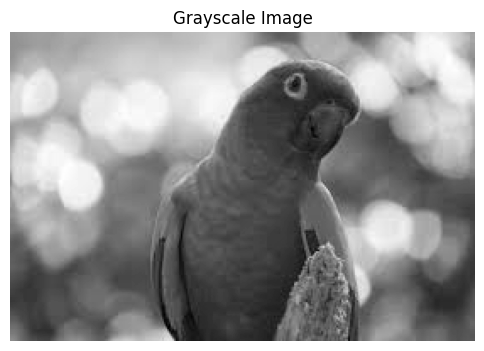

In [45]:
plt.figure(figsize=(6,6))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

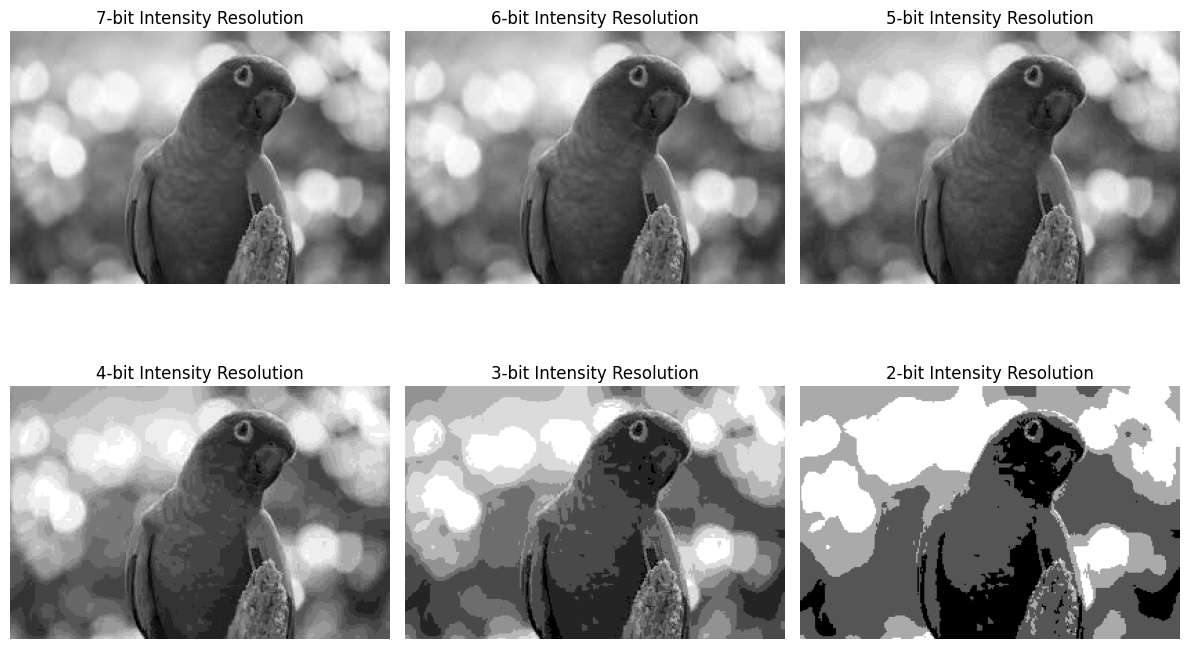

In [46]:
bit_levels = [7, 6, 5, 4, 3, 2]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for i, bits in enumerate(bit_levels):
    reduced_image = (gray_image // (2 ** (8 - bits))) * (2 ** (8 - bits))
    axes[i].imshow(reduced_image, cmap='gray')
    axes[i].set_title(f'{bits}-bit Intensity Resolution')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

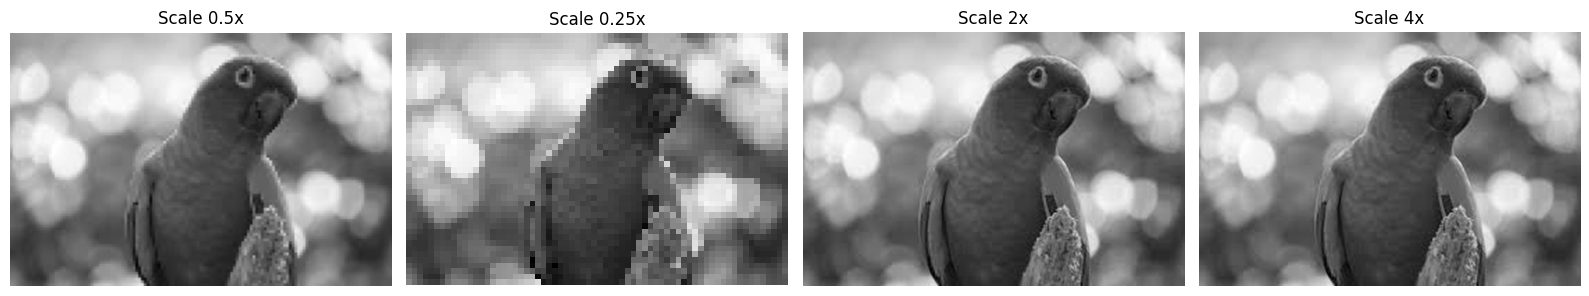

In [47]:
scale_factors = [0.5, 0.25, 2, 4]  # Downscale and Upscale
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, scale in enumerate(scale_factors):
    new_size = (int(gray_image.shape[1] * scale), int(gray_image.shape[0] * scale))
    resized_image = cv2.resize(gray_image, new_size, interpolation=cv2.INTER_CUBIC)
    axes[i].imshow(resized_image, cmap='gray')
    axes[i].set_title(f'Scale {scale}x')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

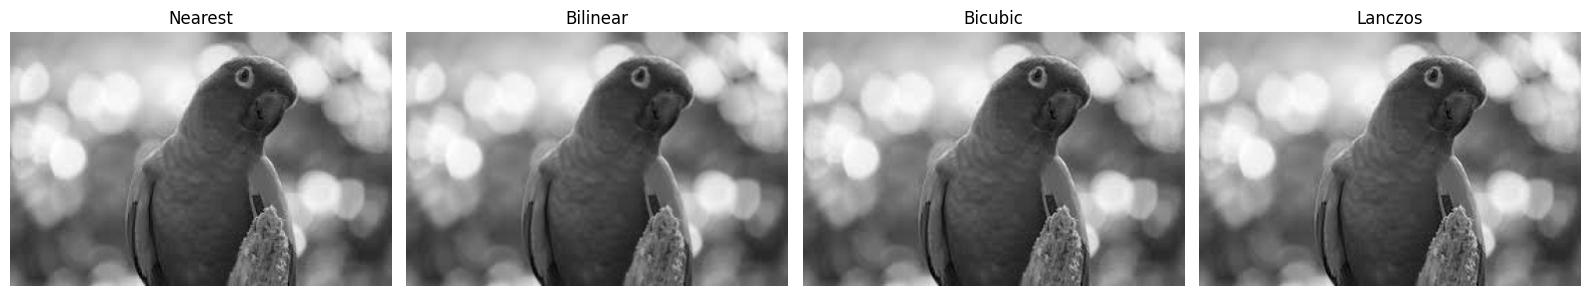

In [48]:
interpolations = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
interpolation_names = ['Nearest', 'Bilinear', 'Bicubic', 'Lanczos']
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, interp in enumerate(interpolations):
    upscaled_image = cv2.resize(gray_image, (gray_image.shape[1] * 2, gray_image.shape[0] * 2), interpolation=interp)
    axes[i].imshow(upscaled_image, cmap='gray')
    axes[i].set_title(interpolation_names[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()